In [32]:
import numpy as np
import tensorflow as tf
import keras as ks
import seaborn as sns
import scipy.stats as sp_stats
plt.xkcd();

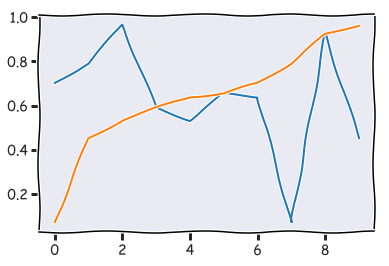

In [33]:
n = 10
x = range(n)
y = np.random.rand(n)b
ys = np.sort(y);
plt.plot(x,y,ys,label='line 1');
#sns.
#sns.scatterplot(x)

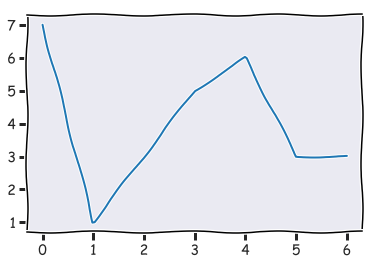

In [39]:
x = np.r_[50,10,20,30,40,20,20,]
xs = sp_stats.rankdataata(x)
plt.plot(xs);

## Vector indexing, filterting, exercises

In [42]:
x = [1,2,3,4]
x[3]
x[::-1]

[4, 3, 2, 1]

In [43]:
x = np.r_[1,3,2,5,4]

In [44]:
x[::-1]

array([4, 5, 2, 3, 1], dtype=int32)

In [48]:
x[::-1]

array([4, 5, 2, 3, 1], dtype=int32)

In [45]:
x[[1,2,0]]

array([3, 2, 1], dtype=int32)

The basic slice syntax is i:j:k where i is the starting index, j is the stopping index, and k is the step (k\neq0).

`a[start:end] # items start through end-1`

`a[start:]    # items start through the rest of the array`

`a[:end]      # items from the beginning through end-1`

`a[:]         # a copy of the whole array1`


In [49]:
np.random.seed(123)
x = np.round(np.random.normal(size=20), 2)
x

array([-1.09,  1.  ,  0.28, -1.51, -0.58,  1.65, -2.43, -0.43,  1.27,
       -0.87, -0.68, -0.09,  1.49, -0.64, -0.44, -0.43,  2.21,  2.19,
        1.  ,  0.39])

* Print all values in $[-2,-1]\cup[1,2]$.

In [157]:
 #| [(x <= 2) & (x >= 1)]
filt = np.logical_or((x <= -1) & (x >= -2), (x <= 2) & (x >= 1))
filt
x[filt]

array([-1.09,  1.  , -1.51,  1.65,  1.27,  1.49,  1.  ])

In [ ]:
* Print the number and the proportion of nonnegative elements in `x`.

In [162]:
%timeit len(x[x >= 0])
%timeit (x>=0).sum()
%timeit np.sum(x>=0)
#print(len(x[x >= 0])/len(x))

1.76 µs ± 5.46 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.19 µs ± 52.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.39 µs ± 18.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


* Compute the arithmetic mean of absolute values.

In [70]:
np.mean(np.abs(x))

1.0335000000000001

* Determine elements in `x` which are the least and the most distant from 0.

In [164]:
print(max(abs(x - 0)))
print(min(abs(x - 0)))

2.43
0.09


* Determine 3 elements in `x` which are the most distant from the arithmetic mean of `x`.

In [180]:
m = np.mean(x)
distances = abs(m - x)
distances_sorted = np.sort(distances)
print("WRONG")
print(distances_sorted[-3:])
#print(np.sort(distances)[-3:])
#[np.argmin(d)]



WRONG
[ 2.0755  2.0955  2.5445]


In [186]:
d = np.abs(x - x.mean())
dsorted = np.argsort(d)
print("Correct")
print(x[dsorted][-3:])

Correct
[ 2.19  2.21 -2.43]


* Create a vector `x2`, which is a version of `x` with all outliers removed,
i.e., all observations $x_i$ such that $x_i\not\in[Q_1-1.5IQR, Q_3+1.5IQR]$,
where $IQR=Q_3-Q_1$ denotes the interquartile range and $Q_1$ and $Q_3$
denote the 1st and 3rd sample quartiles, respectively.


In [192]:
qs = np.percentile(x, [25 ,75])
iqr = qs[1] - qs[0]
print(qs)
print(iqr)
top = qs[1] + 1.5 * iqr
bot = qs[0] - 1.5 * iqr
#x > top
#x < bot
print("Outlier thresholds",top,bot)
print(x[x<bot],x[x>top])

[-0.65    1.0675]
1.7175
Outlier thresholds 3.64375 -3.22625
[] []


* Print the fractional part of each number.

In [193]:
np.modf(x)[0]

array([-0.43, -0.51, -0.09, -0.87, -0.68, -0.64, -0.58, -0.44, -0.43,
       -0.43, -0.09,  0.28,  0.39,  0.  ,  0.  ,  0.27,  0.49,  0.65,
        0.19,  0.21])

* Create a vector `y` such that `y[i]` is equal to `"nonnegative"`
if the corresponding `x[i]>=0` and `"negative"` otherwise.

In [205]:
%%timeit
nonneg = x >= 0
neg = x < 0
y1 = np.empty(len(x), dtype=object)
y1[nonneg] = "nonnegative"
y1[neg] = "negative"
y1

6.74 µs ± 28.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [204]:
# FASTER!
%%timeit
y1 = np.where(x>0, 'nonnegative', 'negative')
y1

3.44 µs ± 24.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


* Create a vector `y` such that `y[i]` is equal to `"small"` if
the corresponding `x[i]<-1`, `"large"` if `x[i]>1` and `"medium"` otherwise.

In [206]:
fsmall = x < -1
flarge = x > 0
fmedium = ~fsmall & ~ flarge
# y = np.empty(len(x), dtype=object)
# np.dtype
# y[nonneg] = "nonnegative"
# y[neg] = "negative"
# y

4 Vector based indexing:

1. scalar
1. slicing
1. int-vector
1. bool-vector

*Only slice indexing returns a view!!*

In [208]:
assert(len(x) == sum([sum(fsmall), sum(fmedium),  sum(flarge)]))

In [209]:
y2 = np.empty(len(x), dtype=object)
np.dtype
y2[fsmall] = "small"
y2[fmedium] = "medium"
y2[flarge] = 'large'
#np.bincount(y2)
#sns.boxplot(y2)

[9 8 3]


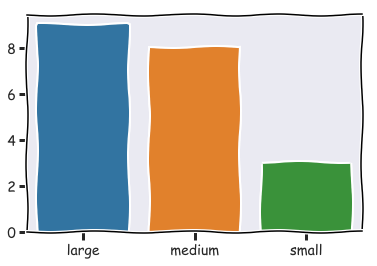

In [210]:
names, count = np.unique(y2, return_counts=True)
print(count)
#sns.barplot()
sns.barplot(y = count, x = [1,2,3])
sns.barplot(y = count, x = names)

In [228]:
x = np.array([1,2,3,4,5])

In [229]:
y = x[0:2:]
y

array([1, 2])

In [220]:
y[0] = 4

In [221]:
x

array([4, 2, 3, 4, 5])

In [222]:
x.ctypes.data

1357076606912

In [224]:
x.strides

(4,)

In [225]:
y = x[1:]

In [227]:
y.ctypes.data, y.strides

(1357076606916, (4,))